In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00


In [2]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


Bernstein–Vazirani full demo


Secret s = 1011   b = 0

Circuit diagram:
      ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 

==== Ideal simulator counts ====
  1101 : 2048 (100.000%)

✅ Ideal: recovered s = 1011

==== Noisy simulator counts ====
  1101 : 1933 (94.385%)
  0101 : 36 (1.758%)
  1001 : 25 (1.221%)
  0001 : 21 (1.025%)
  1100 : 20 (0.977%)
  0000 : 12 (0.586%)
  1000 : 1 (0.049%)

✅ No

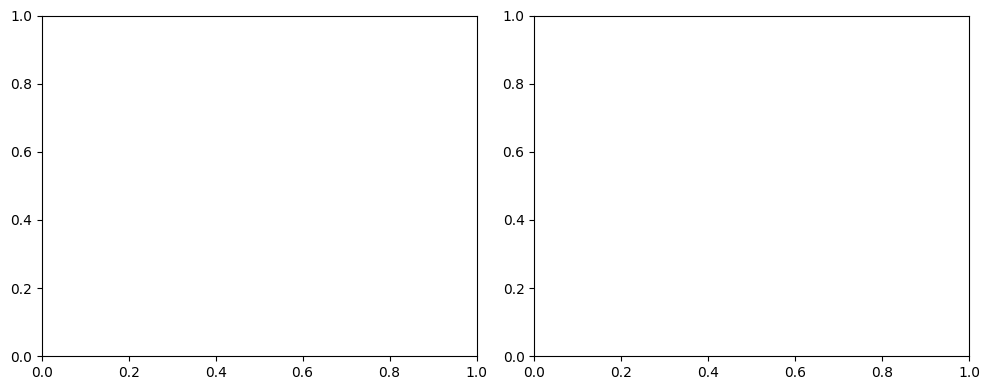




Secret s = 1011   b = 1

Circuit diagram:
      ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ ├───┤ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫─┤ X ├─╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║ └───┘ ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 

==== Ideal simulator counts ====
  1101 : 2048 (100.000%)

✅ Ideal: recovered s = 1011

==== Noisy simulator counts ====
  1101 : 1935 (94.482%)
  0101 : 45 (2.197%)
  1100 : 22 (1.074%)
  1001 : 19 (0.928%)
  0001 : 18 (0.879%)
  0000 : 7 (0.342%)
  1000 : 2 (0.098%)

✅ Noisy: recovered s = 1011


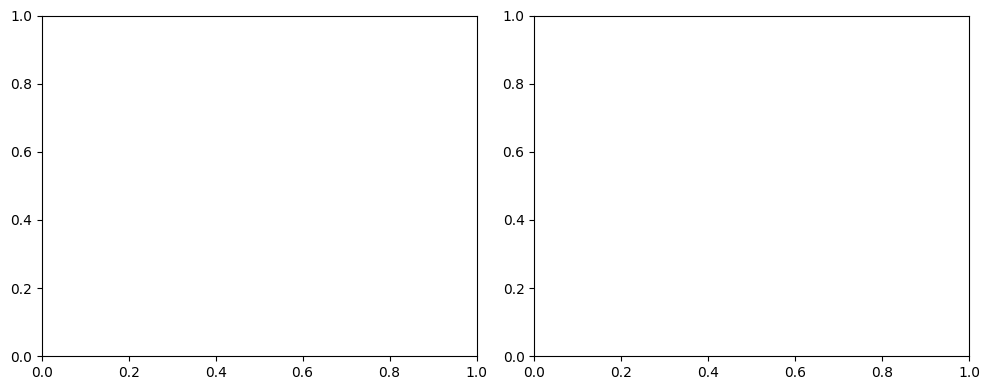




Secret s = 0000   b = 1

Circuit diagram:
      ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├┤ H ├─────┤M├─────────
     ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤ H ├──────╫─┤M├──────
     ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤      ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├──────╫──╫──╫─┤M├
     ├───┤├───┤┌───┐ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├─╫──╫──╫──╫─
     └───┘└───┘└───┘ ║  ║  ║  ║ 
c: 4/════════════════╩══╩══╩══╩═
                     0  1  2  3 

==== Ideal simulator counts ====
  0000 : 2048 (100.000%)

✅ Ideal: recovered s = 0000

==== Noisy simulator counts ====
  0000 : 2048 (100.000%)

✅ Noisy: recovered s = 0000


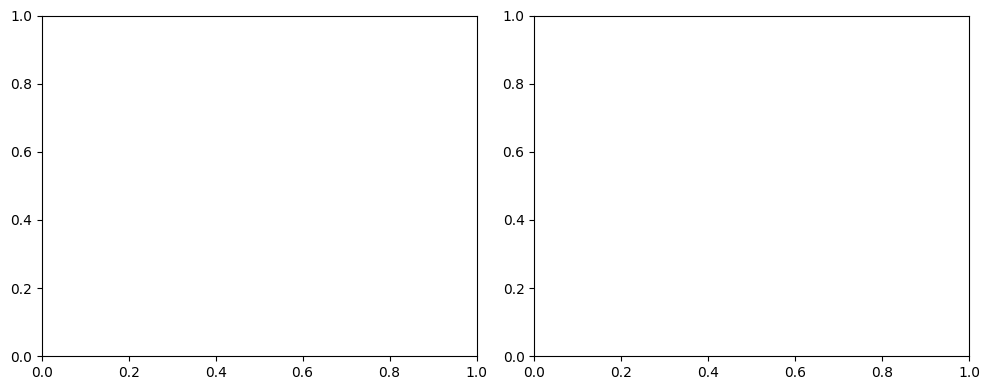




Secret s = 1   b = 0

Circuit diagram:
      ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 

==== Ideal simulator counts ====
  1 : 2048 (100.000%)

✅ Ideal: recovered s = 1

==== Noisy simulator counts ====
  1 : 2011 (98.193%)
  0 : 37 (1.807%)

✅ Noisy: recovered s = 1


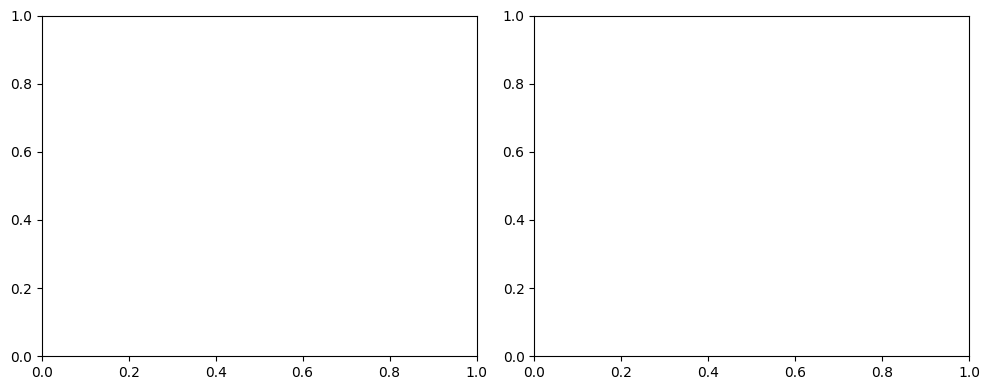



✅ Done.

Notes:
 - The constant b affects only the ancilla/global phase and does NOT change the recovered input register s.
 - In noisy simulation, errors may cause some shots to differ from s.
 - If measured bitstring seems reversed, compare the reversed string as some Qiskit configurations return reversed bit order.

To run on IBM Quantum:
  1) pip install qiskit-ibm-runtime
  2) from qiskit_ibm_runtime import QiskitRuntimeService
  3) QiskitRuntimeService.save_account(channel='ibm_quantum', token='YOUR_TOKEN')
  4) Then call: run_on_ibm_backend(qc, 'ibmq_qasm_simulator')


In [4]:
#!/usr/bin/env python3
"""
Complete Bernstein–Vazirani implementation (one file) that:
 - builds oracle for f(x) = s·x and f(x) = s·x ⊕ b
 - runs on Aer ideal simulator
 - runs with a simple noise model (depolarizing)
 - optionally shows how to run on IBM runtime (commented)
 - prints and plots histograms, and reports if s was recovered

"""

import sys
import subprocess
import importlib
import math

# Try to ensure qiskit and qiskit-aer are available
def ensure_pkg(pkg_name):
    try:
        importlib.import_module(pkg_name)
    except Exception:
        print(f"Package '{pkg_name}' not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg_name])
        print(f"Installed '{pkg_name}' - continuing.")

ensure_pkg("qiskit")
ensure_pkg("qiskit_aer")
ensure_pkg("matplotlib")

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# For noise model
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Optional IBM runtime import (commented usage below)
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

def bv_oracle(qc, inputs, ancilla, s, b=0):
    """
    Oracle that implements f(x) = s·x ⊕ b.
    - qc: QuantumCircuit
    - inputs: list of input qubit indices (0..n-1)
    - ancilla: ancilla qubit index (the last qubit)
    - s: string like '1011' (length n)
    - b: 0 or 1 (constant term)
    """
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)
    if b not in (0, 1):
        raise ValueError("b must be 0 or 1")
    if b == 1:
        qc.x(ancilla)

def build_bv_circuit(s, b=0):
    """
    Build Bernstein–Vazirani circuit for secret s (string) and constant b (0/1).
    Returns a QuantumCircuit that measures the input register into a ClassicalRegister.
    """
    n = len(s)
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(ancilla)
    for q in inputs:
        qc.h(q)
    bv_oracle(qc, inputs, ancilla, s, b=b)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_on_simulator(qc, shots=1024, noise_model=None, backend=None):
    """Run circuit on Aer simulator (optionally noisy)."""
    if backend is None:
        backend = AerSimulator()
    tqc = transpile(qc, backend)
    job = backend.run(tqc, shots=shots, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()
    return counts

def most_likely_bitstring(counts):
    """Return the most probable bitstring."""
    if not counts:
        return None
    return max(counts, key=counts.get)

def normalize_bitstring_order(measured, expected_len):
    """Return measured and reversed bitstring for endian comparison."""
    if measured is None:
        return None, None
    measured = measured.replace(" ", "")
    if len(measured) != expected_len:
        return measured, measured[::-1]
    return measured, measured[::-1]

def create_simple_depolarizing_noise_model(p1_single=0.001, p2_twoqubit=0.01):
    """Create a simple depolarizing noise model."""
    noise_model = NoiseModel()
    single_error = depolarizing_error(p1_single, 1)
    two_error = depolarizing_error(p2_twoqubit, 2)
    noise_model.add_all_qubit_quantum_error(single_error, ['u', 'x', 'h'])
    noise_model.add_all_qubit_quantum_error(two_error, ['cx'])
    return noise_model

def pretty_print_counts(counts, title=None):
    if title:
        print(f"\n==== {title} ====")
    if not counts:
        print("No counts")
        return
    total = sum(counts.values())
    for bitstr, val in sorted(counts.items(), key=lambda x: -x[1])[:10]:
        print(f"  {bitstr} : {val} ({val/total:.3%})")
    print()

def example_runs():
    examples = [
        ("1011", 0),
        ("1011", 1),
        ("0000", 1),
        ("1", 0),
    ]

    shots = 2048
    noise = create_simple_depolarizing_noise_model(p1_single=0.005, p2_twoqubit=0.02)

    for s, b in examples:
        print(f"\nSecret s = {s}   b = {b}")
        qc = build_bv_circuit(s, b=b)
        print("\nCircuit diagram:\n", qc.draw(fold=120))

        counts_ideal = run_on_simulator(qc, shots=shots)
        pretty_print_counts(counts_ideal, "Ideal simulator counts")

        most_ideal = most_likely_bitstring(counts_ideal)
        measured_ideal, measured_ideal_rev = normalize_bitstring_order(most_ideal, len(s))
        if measured_ideal == s or measured_ideal_rev == s:
            print(f"✅ Ideal: recovered s = {s}")
        else:
            print("⚠️ Ideal: did NOT recover s (check reversed bit order).")

        counts_noisy = run_on_simulator(qc, shots=shots, noise_model=noise)
        pretty_print_counts(counts_noisy, "Noisy simulator counts")

        most_noisy = most_likely_bitstring(counts_noisy)
        measured_noisy, measured_noisy_rev = normalize_bitstring_order(most_noisy, len(s))
        if measured_noisy == s or measured_noisy_rev == s:
            print(f"✅ Noisy: recovered s = {s}")
        else:
            print("⚠️ Noisy: did NOT recover s (noise caused errors).")

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plot_histogram(counts_ideal, title="Ideal")
        plt.subplot(1, 2, 2)
        plot_histogram(counts_noisy, title="Noisy")
        plt.tight_layout()
        plt.show()
        print("\n" + "="*60 + "\n")

def run_on_ibm_backend(qc, backend_name="ibmq_qasm_simulator"):
    """
    Optional: Run the circuit on a real IBM Quantum backend.
    Requires: qiskit-ibm-runtime installed and credentials saved via QiskitRuntimeService.save_account()
    """
    try:
        from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
    except ImportError:
        print("⚠️ qiskit-ibm-runtime not installed. Run: pip install qiskit-ibm-runtime")
        return

    print("\nConnecting to IBM Quantum backend...")
    service = QiskitRuntimeService()
    backend = service.backend(backend_name)
    sampler = Sampler(backend=backend)
    tqc = transpile(qc, backend)
    job = sampler.run(tqc)
    result = job.result()
    print("IBM backend quasi-distribution:", result.quasi_dists[0])
    print("✅ IBM Quantum execution complete.")
    return result

def main():
    print("Bernstein–Vazirani full demo\n")
    example_runs()
    print("✅ Done.\n")

    print("Notes:")
    print(" - The constant b affects only the ancilla/global phase and does NOT change the recovered input register s.")
    print(" - In noisy simulation, errors may cause some shots to differ from s.")
    print(" - If measured bitstring seems reversed, compare the reversed string as some Qiskit configurations return reversed bit order.")

    print("\nTo run on IBM Quantum:")
    print("  1) pip install qiskit-ibm-runtime")
    print("  2) from qiskit_ibm_runtime import QiskitRuntimeService")
    print("  3) QiskitRuntimeService.save_account(channel='ibm_quantum', token='YOUR_TOKEN')")
    print("  4) Then call: run_on_ibm_backend(qc, 'ibmq_qasm_simulator')")

if __name__ == "__main__":
    main()